# DREAMS Program Impact and HIV Risk Analysis

### Project Overview
Adolescent girls and young women (AGYW) face a disproportionately higher risk of HIV acquisition compared to their male peers. To address this issue, the Determined, Resilient, Empowered, AIDS-Free, Mentored, and Safe (DREAMS) initiative was launched to mitigate these risks and provide comprehensive interventions. This project aims to analyze the impact of the DREAMS program and identify key risk factors for HIV among AGYW using data-driven insights

### Business Problem
Despite ongoing efforts to reduce HIV infections among AGYW, many remain highly vulnerable due to behavioral, economic, and structural factors. Traditional prevention programs have shown limited effectiveness in reaching this subpopulation. Understanding the demographic, economic, and behavioral characteristics of AGYW at risk is crucial for designing targeted interventions that improve program efficiency and reduce HIV infections.

This analysis will provide valuable insights to policymakers, healthcare providers, and stakeholders in optimizing resource allocation and designing effective prevention strategies for AGYW at risk of HIV acquisition. Demographic Analysis – Examine the age distribution, school attendance, and economic background of AGYW.

### Understanding the Data
The dataset consists of demographic, economic, and behavioral data collected from AGYW participants and non-participants of the DREAMS program. It includes:

- Personal Information: Age, household size, school attendance
- HIV-Related Data: Last HIV test results, frequency of testing
- DREAMS Participation: Enrollment status, intervention details
- Risk Indicators: Behavioral and structural factors such as early sexual debut, alcohol use, and family dynamics

### Project Objectives
The project aims to :

- Analyze Demographic Trends – Investigate the distribution of age, school enrollment, and economic conditions among AGYW.

- Identify HIV Risk Factors – Determine the key behavioral and demographic elements that contribute to an increased risk of HIV infection.

- Evaluate Program Effectiveness – Assess the impact of the DREAMS program by comparing HIV testing trends and risk factors between participants and non-participants.

- Develop Predictive Insights – Utilize data-driven techniques to identify individuals at higher risk, enabling targeted intervention strategies..

In [2]:
#importing the libraries
import summarytools as st
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading the dataset
dreams_df = pd.read_csv("dreams_raw_dataset.zip", compression="zip")
dreams_df.head()

,date_of_birth,date_of_enrollment,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,is_one_parent_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
0,9/16/2004,2/22/2020,Nairobi,Mother,NaN,58.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),8/8/2020,Negative,1,1,1,0,0,NaN,NaN
1,8/2/2004,12/18/2019,Nairobi,Father,NaN,43.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN
2,10/20/2005,3/7/2020,Nairobi,Mother,NaN,41.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,NaN,NaN
3,1/18/2006,3/3/2020,Nairobi,Mother,NaN,45.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
4,3/22/2004,12/18/2019,Nairobi,Father,NaN,42.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN


In [5]:
dreams_df.columns

Index(['date_of_birth', 'date_of_enrollment', 'county', 'head_of_household',
       'head_of_household_other', 'age_of_household_head', 'father_alive',
       'mother_alive', 'are_both_parents_alive', 'is_one_parent_alive',
       'parents_alive_status', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children',
       'ever_missed_full_day_food_in_4wks', 'no_of_days_missed_food_in_4wks',
       'currently_in_school', 'current_school_level', 'current_income_source',
       'ever_tested_for_hiv', 'last_test_result', 'ever_had_sex',
       'age_at_first_sexual_encounter', 'has_sexual_partner',
       'age_of_last_partner', 'used_condom_with_last_partner',
       'dreams_program', 'dreams_program_other', 'exit_status', 'exit_reason',
       'intervention_name', 'intervention_date', 'result', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'exit_age', 'exit_reason_other'],
      dtype='object

In [6]:
#check for the shape of the data set
print(f'This dataset has {dreams_df.shape[0]} rows and {dreams_df.shape[1]} columns')

This dataset has 455807 rows and 42 columns


In [7]:
st.dfSummary(dreams_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,date_of_birth[object],1. 1/1/20002. 1/1/20023. 1/1/19984. 1/1/20015. 1/1/19996. 1/1/19967. 1/1/19978. 1/1/19949. 1/1/200310. 1/1/199511. other,"1,011 (0.2%)993 (0.2%)904 (0.2%)883 (0.2%)875 (0.2%)794 (0.2%)756 (0.2%)614 (0.1%)551 (0.1%)509 (0.1%)447,917 (98.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADaElEQVR4nO3cQWoUYRRG0VehiWbSTQhkCbqHLMLFuohehHsIITUwMZNyIIo41lvQnjPK8B9ceDTUl2XbtoHC1d4P4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MlfLsnxcluX93g/h8l3NzIeZebf3Q7h8zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbmamS8z823vh3D5Fv/FiIozSkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4oGbGRERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8g4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4omWVmbmbmeu+HcLHetm17mZk53N3dfToej7d7v4jLtK7r07Isn7dtezkcj8fbh4eHl9Pp9Lr3w7gsz8/P78/n8+3j4+P1zLwcZmZOp9Pr/f39153fxmW6+fmHHwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDjM/PgXZ+yFcnj+7Oqzr+nQ+n2/nt09B4G9Z1/VpZt5mfBbOv/frs3DrKjJ+IJARGxmxkREbGbGRERsZsZERGxmxkfkOCvhuJDOJMoEAAAAASUVORK5CYII="">",0(0.0%)
2,date_of_enrollment[object],1. 12/9/20202. 12/2/20203. 12/3/20204. 8/23/20175. 12/7/20206. 8/28/20177. 12/10/20208. 12/4/20209. 12/15/202010. 8/25/201711. other,"1,795 (0.4%)1,786 (0.4%)1,723 (0.4%)1,712 (0.4%)1,707 (0.4%)1,691 (0.4%)1,683 (0.4%)1,673 (0.4%)1,671 (0.4%)1,634 (0.4%)438,732 (96.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfUlEQVR4nO3cMWobUQBF0S8jTNyMEAItRovwYrMI7UYITREbN0oRpwhRAgH7DijnVCHVFJfR5PNfVtfrdUDhYekH4P8hNjJiIyM2MmIjIzYyYiMjNjJiI7MaYzyNMcb1en1Z+Fm4c+vdbvc8xhir1eqr4PhMD9M0badp2o4xHpd+GO6bbzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7Oe5/n8/ue3RZ+Eu2eDQGblv8yi4s1GxrqKjHUVGUcfZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IuBZOxuCFjDcbGYMXMgYvZBx9kBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXgh41o4GYMXMr7ZyPgZJWNdRca6ioxvNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZFwLJ2NdRcabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxlvNjIGL2QMXsg4+iAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZGwQyFhXkfFmI2NdRca6ioyjDzJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZFwLJ2PwQsabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxnfbGT8jJKxriJjXUXGNxsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjKuhZOxriLjzUbG4IWMwQsZRx9kxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsi4Fk7G4IXMzzebK+F8pLdbv5Tr3W73/L5BgA8xz/P51oBqPU3T9nA4vGw2m9elHo77cblcvhyPx+3pdHocY/wa2xhjbDab1/1+/22Rp+MePd36S+dsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZNZj/LgWsvSDcB/+1tJ6nufz8Xjcjj9cC4F/9T6i+m1A5Vo4n+HmtXCDFzL+gUBGbGTERkZsZMRGRmxkxEZGbGTERuY7CLkQJ3942gEAAAAASUVORK5CYII="">",1(0.0%)
3,county[object],1. Nairobi2. Kisumu3. Homabay4. Migori5. Siaya6. Mombasa7. Kiambu8. nan,"100,411 (22.0%)82,909 (18.2%)79,954 (17.5%)69,846 (15.3%)60,411 (13.3%)31,890 (7.0%)21,130 (4.6%)9,256 (2.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADS0lEQVR4nO3dQWrbaACG4d/FlOnGJgRyGB9iDjuH8G1CiBaT0o1nMQ1kpk2b1NIrqJ5nl5W1ePmNhL54d7lcBhQ+rH0BbIfYyIiNjNjIiI2M2Mjsxhifxhg

In [8]:
# drop the duplicates
dreams_df = dreams_df.drop_duplicates()

In [9]:
#checking for mising values
dreams_df.isnull().sum()

date_of_birth                             0
date_of_enrollment                        1
county                                 9256
head_of_household                      9606
head_of_household_other              449757
age_of_household_head                 21008
father_alive                          13399
mother_alive                          12978
are_both_parents_alive                    0
is_one_parent_alive                       0
parents_alive_status                  65385
no_of_people_in_household              7191
no_of_females                          7323
no_of_males                            7673
no_of_adults                           7470
no_of_children                         7764
ever_missed_full_day_food_in_4wks      7158
no_of_days_missed_food_in_4wks       199000
currently_in_school                    4171
current_school_level                 200850
current_income_source                129525
ever_tested_for_hiv                       0
last_test_result                

In [10]:
# Convert date columns to datetime format
date_cols = ["date_of_birth", "date_of_enrollment", "intervention_date"]
dreams_df.loc[:, date_cols] = dreams_df[date_cols].apply(pd.to_datetime, errors='coerce')

In [11]:
# Fill missing values for categorical columns with "Unknown"
categorical_cols = ["county", "head_of_household", "father_alive", "mother_alive", 
                    "currently_in_school", "dreams_program", "last_test_result", "exit_reason"]
dreams_df.loc[:, categorical_cols] = dreams_df[categorical_cols].fillna("Unknown")


In [12]:
# Fill missing numerical values with median to reduce skew impact
numerical_cols = ["age_of_household_head", "no_of_people_in_household", "exit_age"]
dreams_df.loc[:, numerical_cols] = dreams_df[numerical_cols].fillna(dreams_df[numerical_cols].median())

In [13]:
# to confirm the cleaning
st.dfSummary(dreams_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,date_of_birth[object],1. 2000-01-01 00:00:002. 2002-01-01 00:00:003. 1998-01-01 00:00:004. 2001-01-01 00:00:005. 1999-01-01 00:00:006. 1996-01-01 00:00:007. 1997-01-01 00:00:008. 1994-01-01 00:00:009. 2003-01-01 00:00:0010. 1995-01-01 00:00:0011. other,"1,010 (0.2%)993 (0.2%)904 (0.2%)882 (0.2%)875 (0.2%)794 (0.2%)756 (0.2%)614 (0.1%)549 (0.1%)509 (0.1%)447,831 (98.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADaElEQVR4nO3cQWoUYRRG0VehiWbSTQhkCbqHLMLFuohehHsIITUwMZNyIIo41lvQnjPK8B9ceDTUl2XbtoHC1d4P4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MlfLsnxcluX93g/h8l3NzIeZebf3Q7h8zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbmamS8z823vh3D5Fv/FiIozSkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4oGbGRERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8g4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4omWVmbmbmeu+HcLHetm17mZk53N3dfToej7d7v4jLtK7r07Isn7dtezkcj8fbh4eHl9Pp9Lr3w7gsz8/P78/n8+3j4+P1zLwcZmZOp9Pr/f39153fxmW6+fmHHwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDjM/PgXZ+yFcnj+7Oqzr+nQ+n2/nt09B4G9Z1/VpZt5mfBbOv/frs3DrKjJ+IJARGxmxkREbGbGRERsZsZERGxmxkfkOCvhuJDOJMoEAAAAASUVORK5CYII="">",0(0.0%)
2,date_of_enrollment[object],1. 2020-12-09 00:00:002. 2020-12-02 00:00:003. 2020-12-03 00:00:004. 2017-08-23 00:00:005. 2020-12-07 00:00:006. 2017-08-28 00:00:007. 2020-12-10 00:00:008. 2020-12-04 00:00:009. 2020-12-15 00:00:0010. 2017-08-25 00:00:0011. other,"1,795 (0.4%)1,786 (0.4%)1,723 (0.4%)1,712 (0.4%)1,705 (0.4%)1,691 (0.4%)1,683 (0.4%)1,672 (0.4%)1,671 (0.4%)1,634 (0.4%)438,645 (96.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfUlEQVR4nO3cMWobUQBF0S8jTNyMEAItRovwYrMI7UYITREbN0oRpwhRAgH7DijnVCHVFJfR5PNfVtfrdUDhYekH4P8hNjJiIyM2MmIjIzYyYiMjNjJiI7MaYzyNMcb1en1Z+Fm4c+vdbvc8xhir1eqr4PhMD9M0badp2o4xHpd+GO6bbzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7Oe5/n8/ue3RZ+Eu2eDQGblv8yi4s1GxrqKjHUVGUcfZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IuBZOxuCFjDcbGYMXMgYvZBx9kBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXgh41o4GYMXMr7ZyPgZJWNdRca6ioxvNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZFwLJ2NdRcabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxlvNjIGL2QMXsg4+iAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZGwQyFhXkfFmI2NdRca6ioyjDzJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZFwLJ2PwQsabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxnfbGT8jJKxriJjXUXGNxsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjKuhZOxriLjzUbG4IWMwQsZRx9kxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsi4Fk7G4IXMzzebK+F8pLdbv5Tr3W73/L5BgA8xz/P51oBqPU3T9nA4vGw2m9elHo77cblcvhyPx+3pdHocY/wa2xhjbDab1/1+/22Rp+MePd36S+dsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZNZj/LgWsvSDcB/+1tJ6nufz8Xjcjj9cC4F/9T6i+m1A5Vo4n+HmtXCDFzL+gUBGbGTERkZsZMRGRmxkxEZGbGTERuY7CLkQJ3942gEAAAAASUVORK5CYII="">",1(0.0%)
3,county[object],1. Nairobi2. Kisumu3. Homabay4. Migori5. Siaya6. Mombasa7. Kiambu8. Unknown,"100,397 (22.0%)82,893 (18.2%)79,934 (17.5%)69,829 (15.3%)60,402 (13.3%)31,879 (7.0%)21,127 (4.6%)9,256 (2.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG9

In [14]:
dreams_df.head()

,date_of_birth,date_of_enrollment,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,is_one_parent_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
0,2004-09-16 00:00:00,2020-02-22 00:00:00,Nairobi,Mother,NaN,58.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),2020-08-08 00:00:00,Negative,1,1,1,0,0,20.0,NaN
1,2004-08-02 00:00:00,2019-12-18 00:00:00,Nairobi,Father,NaN,43.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),2020-04-27 00:00:00,Negative,1,1,1,0,0,20.0,NaN
2,2005-10-20 00:00:00,2020-03-07 00:00:00,Nairobi,Mother,NaN,41.0,No,Yes,No,Yes,...,HTS - HTS (Client),2020-08-12 00:00:00,Negative,1,1,0,0,0,20.0,NaN
3,2006-01-18 00:00:00,2020-03-03 00:00:00,Nairobi,Mother,NaN,45.0,No,Yes,No,Yes,...,HTS - HTS (Client),2020-08-12 00:00:00,Negative,1,1,1,0,0,20.0,NaN
4,2004-03-22 00:00:00,2019-12-18 00:00:00,Nairobi,Father,NaN,42.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),2020-04-27 00:00:00,Negative,1,1,1,0,0,20.0,NaN


### EDA 

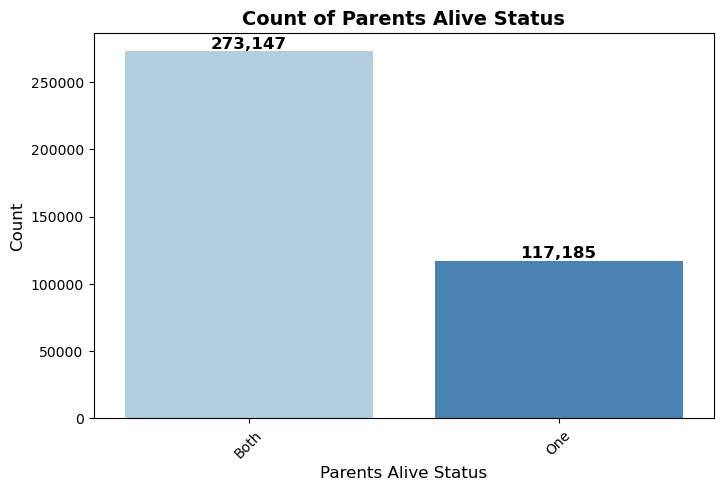

In [16]:
plt.figure(figsize=(8, 5))

# Create count plot with a single color tone
ax = sns.countplot(x='parents_alive_status', data=dreams_df, hue='parents_alive_status', palette='Blues', legend=False)

# Add exact count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',  # Format number with commas
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize labels and title
plt.title("Count of Parents Alive Status", fontsize=14, fontweight='bold')
plt.xlabel("Parents Alive Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.show()


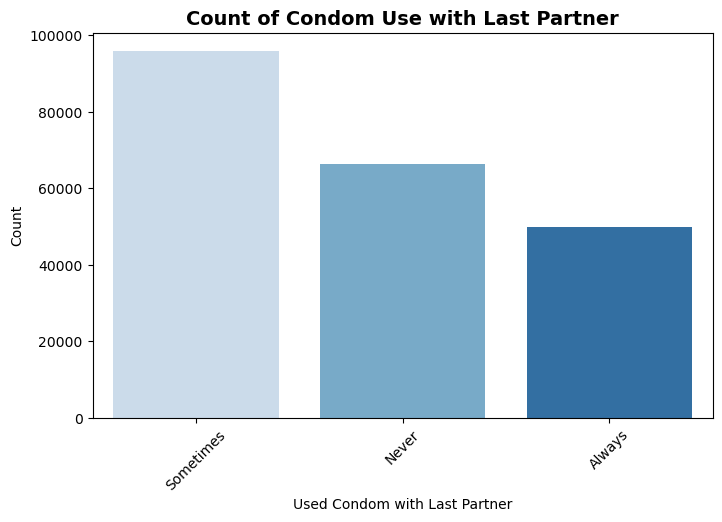

In [18]:
plt.figure(figsize=(8, 5))

sns.countplot(x='used_condom_with_last_partner', 
              data=dreams_df, 
              hue='used_condom_with_last_partner', 
              palette='Blues', 
              legend=False)

plt.title("Count of Condom Use with Last Partner", fontsize=14, fontweight='bold')
plt.xlabel("Used Condom with Last Partner")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

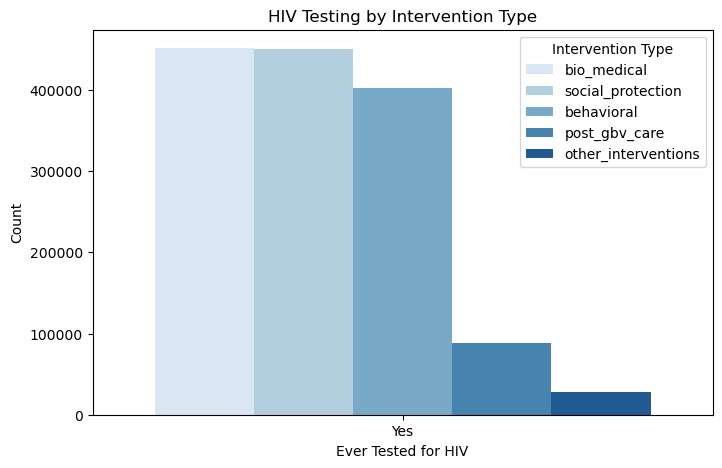

In [19]:
plt.figure(figsize=(8, 5))
intervention_cols = ["bio_medical", "social_protection", "behavioral", "post_gbv_care", "other_interventions"]
df_intervention = dreams_df.melt(id_vars=['ever_tested_for_hiv'], value_vars=intervention_cols, var_name="Intervention_Type", value_name="Received")

# Filter only those who received an intervention
df_intervention = df_intervention[df_intervention['Received'] == 1]

sns.countplot(x="ever_tested_for_hiv", hue="Intervention_Type", data=df_intervention, palette="Blues")
plt.xlabel("Ever Tested for HIV")
plt.ylabel("Count")
plt.title("HIV Testing by Intervention Type")
plt.legend(title="Intervention Type", bbox_to_anchor=(1, 1))
plt.show()


#### insights
- A significant number of individuals have been tested for HIV under different intervention types.
- The highest number of tests is observed in bio_medical, social_protection, and behavioral interventions, which dominate the dataset.
- Post-GBV care and other interventions have significantly lower testing numbers compared to other categories.
- Bio-medical and social protection interventions may play a crucial role in encouraging HIV testing, making them valuable in HIV prevention programs.
- Targeted efforts might be needed to increase HIV testing rates in post-GBV care and other intervention categories.

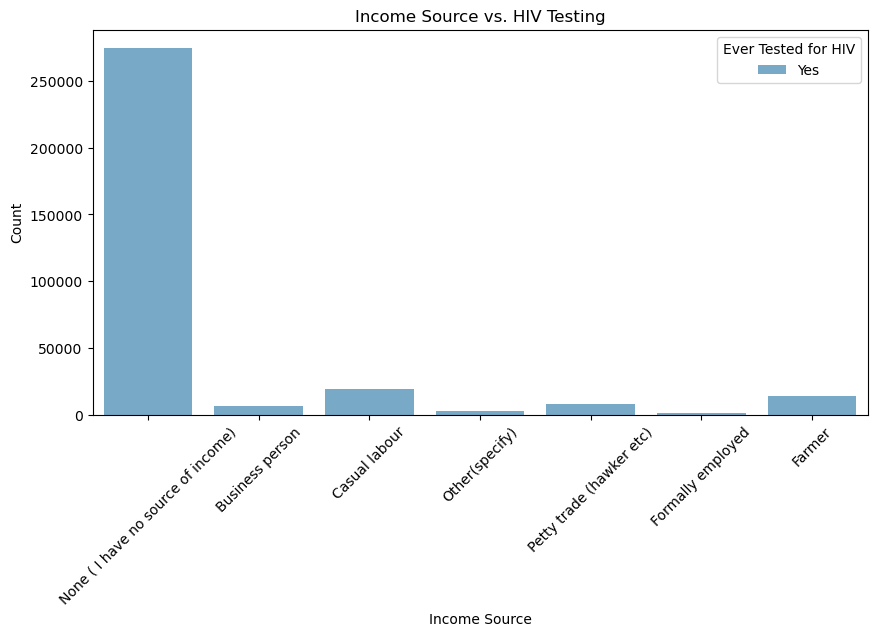

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x="current_income_source", hue="ever_tested_for_hiv", data=dreams_df, palette="Blues")
plt.xticks(rotation=45)
plt.xlabel("Income Source")
plt.ylabel("Count")
plt.title("Income Source vs. HIV Testing")
plt.legend(title="Ever Tested for HIV")
plt.show()

#### insights
- Unemployed individuals dominate the testing population, suggesting effective outreach to financially vulnerable groups.
- Employed and business persons have low representation, indicating possible barriers like time constraints or alternative testing access points.
- Further interventions may be needed to engage employed individuals in regular HIV testing.

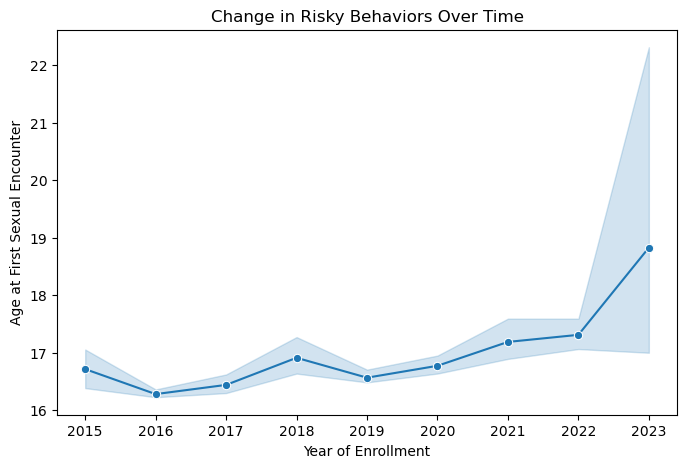

In [26]:
dreams_df['year_of_enrollment'] = pd.to_datetime(dreams_df['date_of_enrollment']).dt.year

plt.figure(figsize=(8, 5))
sns.lineplot(data=dreams_df, x='year_of_enrollment', y='age_at_first_sexual_encounter', marker='o')
plt.xlabel('Year of Enrollment')
plt.ylabel('Age at First Sexual Encounter')
plt.title('Change in Risky Behaviors Over Time')
plt.show()

#### insights
- The age at first sexual encounter appears to have increased gradually from 2016 to 2023.which may indicate Better sexual health education and awareness, possibly due to programs like DREAMS or other community interventions and Increased empowerment and decision-making ability among young people, leading to more informed choices.

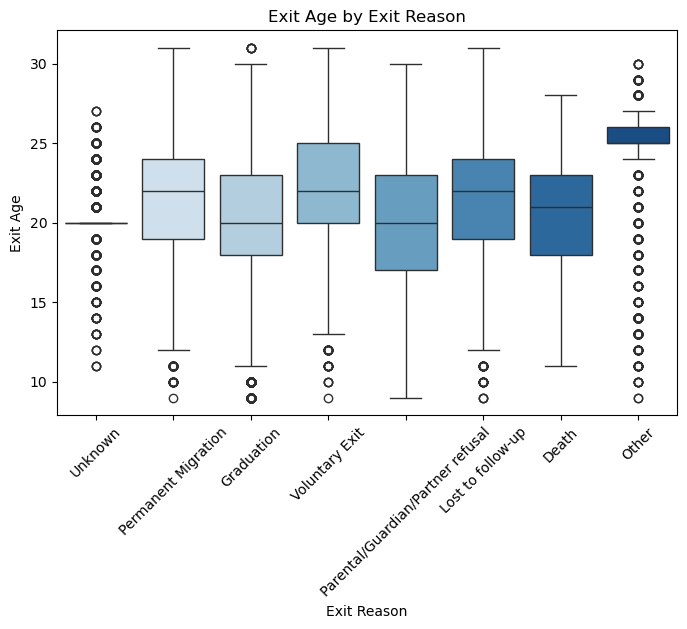

In [27]:
# age distibution by exit reason

plt.figure(figsize=(8, 5))
sns.boxplot(x='exit_reason', y='exit_age', data=dreams_df, hue='exit_reason', palette='Blues', legend=False)
plt.xticks(rotation=45)
plt.xlabel("Exit Reason")
plt.ylabel("Exit Age")     
plt.title("Exit Age by Exit Reason")
plt.show()

#### Insights
- Graduation and Voluntary Exit have a relatively higher median exit age, which suggests participants are completing the program at a later age.
- Early exits (e.g., due to "Lost to follow-up" or "Guardian/Partner refusal") might indicate challenges in retention.
- High variability in some categories suggests different factors influence when participants leave the program.